In [46]:
from sympy import *
import schemdraw
import schemdraw.elements as elm
import numpy as np 
import matplotlib.pyplot as plt 

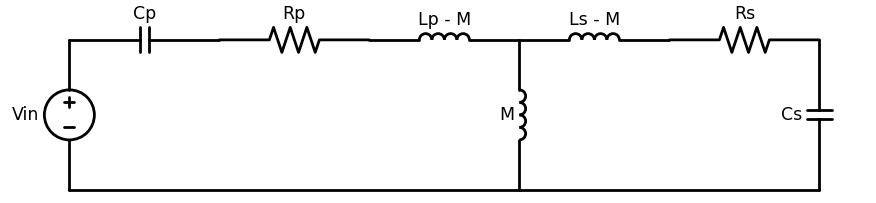

In [47]:
d = schemdraw.Drawing()
C = d.add(elm.Capacitor(label="Cp"))
d.add(elm.Resistor(label="Rp"))
L = d.add(elm.Inductor(label="Lp - M"))
M = d.add(elm.Inductor("down", label="M"))
d.add(elm.Line('left', tox=C.start))
d.add(elm.SourceV('up', label="Vin"))
d.add(elm.Inductor("right", label="Ls - M", at=L.end))
d.add(elm.Resistor(label="Rs"))
d.add(elm.Capacitor("down", label="Cs"))
d.add(elm.Line("left", tox=M.end))
d.draw()

In [48]:
i1, i2, i3 = symbols("i1 i2 i3")
vin, vout = symbols("vin vout")

Rp, Cp, Lp = symbols("Rp, Cp, Lp")
Rs, Cs, Ls = symbols("Rs, Cs, Ls")

k, M = symbols("k M")
s = symbols("s")

Zp = 1/(s*Cp) + Rp + s*(Lp - M)
Zs = 1/(s*Cs) + Rs + s*(Ls - M)
Zm = s*M

eq1 = vin - Zp*i1 - Zm*i2
eq2 = Zm*i2 - i3*Zs
eq3 = i1 - i2 - i3

res = solve([eq1, eq2, eq3], [i1, i2, i3])
i3_sol = res[i3]

vout = i3_sol/(s*Cs)
Tf = vout/vin

Tf = Tf.subs(M, k*sqrt(Lp*Ls))
Tf

Cp*k*s**2*sqrt(Lp*Ls)/(-Cp*Cs*Lp*Ls*k**2*s**4 + Cp*Cs*Lp*Ls*s**4 + Cp*Cs*Lp*Rs*s**3 + Cp*Cs*Ls*Rp*s**3 + Cp*Cs*Rp*Rs*s**2 + Cp*Lp*s**2 + Cp*Rp*s + Cs*Ls*s**2 + Cs*Rs*s + 1)

In [49]:
numerical_expressions = {
    # Circuit lumped parameters
    # Primary winding
    Rp : 1,      # [Ohm]
    Lp : 1.2e-5,   # [H]
    Cp : 7.5e-8,   # [F]
    # Secondary winding
    Rs : 100,      # [Ohm]
    Ls : 1.8e-2, # [H]
    Cs : 50e-12,  # [F]
    # Coupling coefficient
    k : 0.2,     # [1]  
}

Tf_sim = Tf.subs(numerical_expressions)
Tf_sim

6.97137002317335e-12*s**2/(7.776e-25*s**4 + 7.2e-20*s**3 + 1.800375e-12*s**2 + 8.0e-8*s + 1)

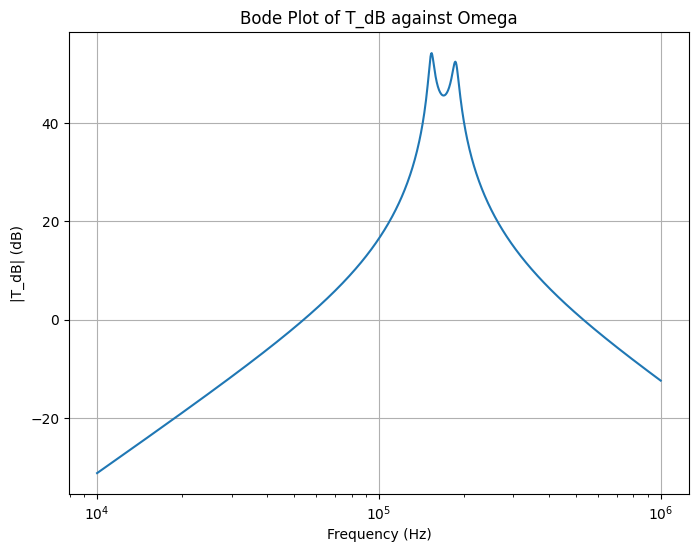

In [50]:
freq = np.logspace(4, 6, 1000)  # [Hz]
omega = 2*np.pi*freq            # [rad/s]
s_num = 1j*omega

Tf_lambda = lambdify(s, Tf_sim, 'numpy')

Tf_eval = np.array([Tf_lambda(s_) for s_ in s_num])
Tf_db = 20 * np.log10(np.abs(Tf_eval))
 
plt.figure(figsize=(8, 6))

plt.semilogx(freq, Tf_db)

plt.title('Bode Plot of T_dB against Omega')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|T_dB| (dB)')
plt.grid(True)
plt.show()